In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [4]:
inputs.shape, targets.shape

((2000, 2), (2000, 1))

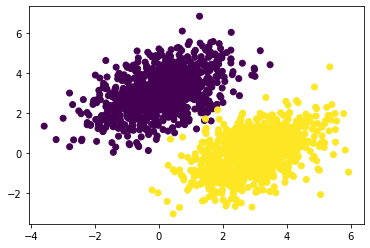

In [5]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [6]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

2022-08-05 10:53:44.528381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 10:53:44.533657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 10:53:44.533824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-05 10:53:44.534725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [8]:
def square_loss(targets, predictions):
    per_sample_loss = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_loss)

In [9]:
lr = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])

    W.assign_sub(grad_loss_wrt_W * lr)
    b.assign_sub(grad_loss_wrt_b * lr)

    return loss

In [10]:
for step in range(40):
    loss = training_step(inputs, targets)
    if step%4 == 0:
        print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 3.8228
Loss at step 4: 0.1253
Loss at step 8: 0.0950
Loss at step 12: 0.0745
Loss at step 16: 0.0601
Loss at step 20: 0.0500
Loss at step 24: 0.0428
Loss at step 28: 0.0378
Loss at step 32: 0.0343
Loss at step 36: 0.0318


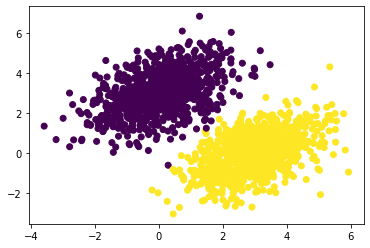

In [11]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

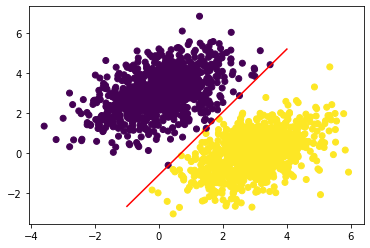

In [12]:
x = np.linspace(-1, 4, 100)
y = ((-W[0] * x) + (0.5 - b)) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()